In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import pandas as pd
import argparse
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve
from sklearn.metrics import precision_recall_curve
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
img_info = pd.read_csv('Ki67ImgInfo.csv')

In [3]:
img_info.head()

,TNEID,ID PATIENT,Code Diag,Origine
0,TNE1925,393,CA,Milan
1,TNE1927,400,CA,Milan
2,TNE1929,492,CT,Milan
3,TNE1931,609,CT,Milan
4,TNE1933,716,CA,Milan


In [4]:
img_info =  img_info.rename(columns={" ID (anonyme)" : "TNEID" })

In [5]:
# tets
rootdir  = '/gpfsscratch/rech/ohv/ueu39kt/CFLOW/viz'
dir_exp = 'TumorNormal_Ki67_model_low_lr_ep5_9'

In [6]:
def get_df(rootdir, dir_exp):
    path_ = f'{rootdir}/{dir_exp}/Tumor/results_table.csv'
    df_ = pd.read_csv(path_)
    return df_

In [7]:
def get_train_df(rootdir, dir_exp):
    path_ = f'{rootdir}/{dir_exp}/Tumor/results_table_train.csv'
    df_ = pd.read_csv(path_)
    return df_

In [8]:
df = pd.DataFrame()
df_ = get_df(rootdir, dir_exp)
df = df.append(df_)
df['Set'] = ['Test'] * df.shape[0]

In [9]:
df_tr = pd.DataFrame()
df_ = get_train_df(rootdir, dir_exp)
df_tr = df_tr.append(df_)
df_tr['Set'] = ['Train'] * df_tr.shape[0]

In [10]:
df_all = df.append(df_tr)

In [11]:
df_all.head()

,file_path,binary_lab,MaxScoreAnomalyMap,MeanScoreAnomalyMap,Set
0,/gpfsscratch/rech/ohv/ueu39kt/KI67_Normal_Tumo...,1,2.073941,1.518571,Test
1,/gpfsscratch/rech/ohv/ueu39kt/KI67_Normal_Tumo...,1,2.318089,1.549758,Test
2,/gpfsscratch/rech/ohv/ueu39kt/KI67_Normal_Tumo...,1,2.622362,1.847405,Test
3,/gpfsscratch/rech/ohv/ueu39kt/KI67_Normal_Tumo...,1,2.154622,1.456139,Test
4,/gpfsscratch/rech/ohv/ueu39kt/KI67_Normal_Tumo...,1,1.844582,1.432077,Test


In [12]:
i = 0
df_all.iloc[i,0].split('/')[-3]

'TNE1720'

In [13]:
sample_id = []
for i in range(df_all.shape[0]):
    sample_id.append(df_all.iloc[i,0].split('/')[-3])
df_all['TNEID'] = sample_id

In [14]:
sample_id = []
for i in range(df_all.shape[0]):
    sample_id.append(df_all.iloc[i,0].split('/')[-2])
df_all['Class'] = sample_id

In [15]:
mean_train = df_all.loc[(df_all['Set'] == 'Train') , 'MaxScoreAnomalyMap'].mean()
df_all['MSE'] = (mean_train - df_all['MaxScoreAnomalyMap'])**2

In [16]:
df_all.head()

,file_path,binary_lab,MaxScoreAnomalyMap,MeanScoreAnomalyMap,Set,TNEID,Class,MSE
0,/gpfsscratch/rech/ohv/ueu39kt/KI67_Normal_Tumo...,1,2.073941,1.518571,Test,TNE1720,Normal,0.071202
1,/gpfsscratch/rech/ohv/ueu39kt/KI67_Normal_Tumo...,1,2.318089,1.549758,Test,TNE1831,Tumoral,0.000515
2,/gpfsscratch/rech/ohv/ueu39kt/KI67_Normal_Tumo...,1,2.622362,1.847405,Test,TNE1597,Tumoral,0.079290
3,/gpfsscratch/rech/ohv/ueu39kt/KI67_Normal_Tumo...,1,2.154622,1.456139,Test,TNE1560,Tumoral,0.034654
4,/gpfsscratch/rech/ohv/ueu39kt/KI67_Normal_Tumo...,1,1.844582,1.432077,Test,TNE1574,Normal,0.246209


In [17]:
img_info.head()

,TNEID,ID PATIENT,Code Diag,Origine
0,TNE1925,393,CA,Milan
1,TNE1927,400,CA,Milan
2,TNE1929,492,CT,Milan
3,TNE1931,609,CT,Milan
4,TNE1933,716,CA,Milan


In [18]:
df_all.index = range(df_all.shape[0])

In [19]:
df_all.loc[df_all['Class']== 'Normal', 'BinaryLabels'] = 0
df_all.loc[df_all['Class']== 'Tumoral', 'BinaryLabels'] = 1

In [20]:
origin = []
for i in range(df_all.shape[0]):
    tne = df_all['TNEID'][i]
    print(tne)
    if tne == 'TNE1512':
        origin.append('Unknown')
    else:
        origin.append(img_info[img_info['TNEID'] == tne]['Origine'].values[0])

TNE1720
TNE1831
TNE1597
TNE1560
TNE1574
TNE2123
TNE1552
TNE1488
TNE1817
TNE1606
TNE1710
TNE1488
TNE1801
TNE1503
TNE1817
TNE2041
TNE1481
TNE1817
TNE2041
TNE1801
TNE1831
TNE1460
TNE1720
TNE1597
TNE1460
TNE1817
TNE1597
TNE1460
TNE1578
TNE2123
TNE1867
TNE1574
TNE1552
TNE1460
TNE1586
TNE1481
TNE1460
TNE1578
TNE1931
TNE1867
TNE2041
TNE1488
TNE2123
TNE1548
TNE1710
TNE1710
TNE1512
TNE1447
TNE1488
TNE1560
TNE1710
TNE1606
TNE1578
TNE1801
TNE1817
TNE1606
TNE1481
TNE1512
TNE1460
TNE1488
TNE1720
TNE1460
TNE1578
TNE1941
TNE1460
TNE1720
TNE1447
TNE2003
TNE1582
TNE1606
TNE1606
TNE1481
TNE1586
TNE1931
TNE1528
TNE1606
TNE1574
TNE2041
TNE1488
TNE1586
TNE1528
TNE1488
TNE1732
TNE1447
TNE1606
TNE1831
TNE2098
TNE1817
TNE1512
TNE1586
TNE1503
TNE2041
TNE1931
TNE1460
TNE1548
TNE1552
TNE1941
TNE1512
TNE1578
TNE1831
TNE2003
TNE1817
TNE1528
TNE1460
TNE1460
TNE2098
TNE1447
TNE1817
TNE1528
TNE1606
TNE1931
TNE1512
TNE1503
TNE2037
TNE1606
TNE2123
TNE1460
TNE1488
TNE1608
TNE1488
TNE1578
TNE2037
TNE1831
TNE1503
TNE1829


TNE1548
TNE1867
TNE2003
TNE1578
TNE1801
TNE1578
TNE1831
TNE1460
TNE1608
TNE1831
TNE1801
TNE1528
TNE1608
TNE1460
TNE1720
TNE1941
TNE1488
TNE1801
TNE1512
TNE2098
TNE2123
TNE1801
TNE1460
TNE1447
TNE1488
TNE1867
TNE1801
TNE1552
TNE1801
TNE1608
TNE1488
TNE1574
TNE1512
TNE1586
TNE1801
TNE1582
TNE2098
TNE1597
TNE1582
TNE1831
TNE1560
TNE1481
TNE2098
TNE1503
TNE2037
TNE1931
TNE1488
TNE1447
TNE1710
TNE2041
TNE1536
TNE1867
TNE2098
TNE2003
TNE1831
TNE1817
TNE1528
TNE1867
TNE1481
TNE1606
TNE1720
TNE1578
TNE1829
TNE2003
TNE2123
TNE1931
TNE2123
TNE1831
TNE1528
TNE1460
TNE1941
TNE1528
TNE1831
TNE1536
TNE2123
TNE1817
TNE1801
TNE1528
TNE1831
TNE1829
TNE1447
TNE1867
TNE1512
TNE1829
TNE1867
TNE2003
TNE1481
TNE1488
TNE1801
TNE1574
TNE1941
TNE1867
TNE1536
TNE1582
TNE1528
TNE1574
TNE1488
TNE1481
TNE2037
TNE1586
TNE2098
TNE1867
TNE1608
TNE1528
TNE1829
TNE1578
TNE1606
TNE2098
TNE1512
TNE1552
TNE1720
TNE1608
TNE1460
TNE1606
TNE2123
TNE1512
TNE1512
TNE1586
TNE1831
TNE1817
TNE2003
TNE2098
TNE2123
TNE1829
TNE1732


TNE1597
TNE1548
TNE1460
TNE1829
TNE1460
TNE2123
TNE1460
TNE1552
TNE1710
TNE1528
TNE1528
TNE1578
TNE1931
TNE1582
TNE1608
TNE1831
TNE1710
TNE2041
TNE1817
TNE1710
TNE1447
TNE1460
TNE1460
TNE1503
TNE2037
TNE1503
TNE1488
TNE1710
TNE2123
TNE1817
TNE1460
TNE1503
TNE1460
TNE1831
TNE1867
TNE2037
TNE1867
TNE2123
TNE1488
TNE2123
TNE1447
TNE1488
TNE1560
TNE1867
TNE1560
TNE1732
TNE1829
TNE2123
TNE1460
TNE1447
TNE1801
TNE1710
TNE1512
TNE1710
TNE1817
TNE1608
TNE1460
TNE1578
TNE1817
TNE1817
TNE2098
TNE1512
TNE2041
TNE1552
TNE1528
TNE1447
TNE1586
TNE2123
TNE2123
TNE1460
TNE1528
TNE2123
TNE1447
TNE1460
TNE1817
TNE1512
TNE1710
TNE1817
TNE1582
TNE1608
TNE1503
TNE1608
TNE1481
TNE1817
TNE1597
TNE1536
TNE1488
TNE2037
TNE1488
TNE1503
TNE1460
TNE1817
TNE1710
TNE2123
TNE1817
TNE2041
TNE1578
TNE1503
TNE2123
TNE1597
TNE1720
TNE1560
TNE2003
TNE1460
TNE2003
TNE1829
TNE1447
TNE1817
TNE1710
TNE1481
TNE1578
TNE1867
TNE1488
TNE1710
TNE2037
TNE1831
TNE1606
TNE1867
TNE1578
TNE1732
TNE1817
TNE1574
TNE1481
TNE1831
TNE1710


TNE1586
TNE1578
TNE1560
TNE1552
TNE1710
TNE2037
TNE1574
TNE1831
TNE1582
TNE1831
TNE1831
TNE1481
TNE1710
TNE1552
TNE1720
TNE1552
TNE1578
TNE1867
TNE1931
TNE1447
TNE2037
TNE1732
TNE1817
TNE1597
TNE1481
TNE1503
TNE1586
TNE1488
TNE1817
TNE2041
TNE1460
TNE2098
TNE1536
TNE1528
TNE2098
TNE1512
TNE1560
TNE1606
TNE1503
TNE1481
TNE1460
TNE1503
TNE1582
TNE1512
TNE2098
TNE1548
TNE1831
TNE1710
TNE1817
TNE1512
TNE2003
TNE1488
TNE2041
TNE2037
TNE1931
TNE1582
TNE1597
TNE1447
TNE1720
TNE1512
TNE1578
TNE1512
TNE1732
TNE1512
TNE1732
TNE1503
TNE1710
TNE1503
TNE1817
TNE1732
TNE1512
TNE1710
TNE1447
TNE1503
TNE1560
TNE1528
TNE1488
TNE1536
TNE1720
TNE1447
TNE1578
TNE1481
TNE1460
TNE1488
TNE1817
TNE1608
TNE1710
TNE1503
TNE1608
TNE1460
TNE2041
TNE1528
TNE1460
TNE1801
TNE1447
TNE1582
TNE2098
TNE1710
TNE1831
TNE1817
TNE1503
TNE1552
TNE1488
TNE1460
TNE1528
TNE1552
TNE1732
TNE2041
TNE1606
TNE1829
TNE1710
TNE1536
TNE1552
TNE2123
TNE2041
TNE1831
TNE1528
TNE1560
TNE1606
TNE1608
TNE1447
TNE1512
TNE1488
TNE1552
TNE1829


TNE2123
TNE1941
TNE1582
TNE1732
TNE1817
TNE2037
TNE1732
TNE1512
TNE2037
TNE1597
TNE1460
TNE1503
TNE1801
TNE2041
TNE1536
TNE1512
TNE1801
TNE1488
TNE1552
TNE1488
TNE1460
TNE1801
TNE1801
TNE1867
TNE1586
TNE1488
TNE1829
TNE1460
TNE1447
TNE1488
TNE1710
TNE1560
TNE1931
TNE1578
TNE1481
TNE2041
TNE1582
TNE1817
TNE1528
TNE1710
TNE1732
TNE1720
TNE1720
TNE1710
TNE2037
TNE1931
TNE1941
TNE1560
TNE1460
TNE2041
TNE1801
TNE1512
TNE1931
TNE1867
TNE1586
TNE1481
TNE1481
TNE1710
TNE1817
TNE1586
TNE1503
TNE2041
TNE1941
TNE1817
TNE1512
TNE1817
TNE1512
TNE1560
TNE1460
TNE1488
TNE1732
TNE1574
TNE1941
TNE1831
TNE1710
TNE1817
TNE2123
TNE1447
TNE1831
TNE1548
TNE1606
TNE1817
TNE1931
TNE1512
TNE1536
TNE1488
TNE1512
TNE2123
TNE1801
TNE1488
TNE2098
TNE1732
TNE1597
TNE1831
TNE1608
TNE1460
TNE1552
TNE2098
TNE1597
TNE1503
TNE1560
TNE1582
TNE1488
TNE1586
TNE1512
TNE1578
TNE1552
TNE1578
TNE1503
TNE1488
TNE1831
TNE1460
TNE1817
TNE1801
TNE1831
TNE1582
TNE1817
TNE1817
TNE1488
TNE2098
TNE2037
TNE1578
TNE1560
TNE1481
TNE1732


TNE1536
TNE1536
TNE1460
TNE1481
TNE1597
TNE1503
TNE1582
TNE1488
TNE2098
TNE1503
TNE1831
TNE2098
TNE2003
TNE1528
TNE1586
TNE1606
TNE1578
TNE1710
TNE1512
TNE1608
TNE1488
TNE1586
TNE2041
TNE1608
TNE1488
TNE1829
TNE2123
TNE1867
TNE1931
TNE1801
TNE1720
TNE1512
TNE1447
TNE1536
TNE1720
TNE1528
TNE1512
TNE1578
TNE1931
TNE1574
TNE1560
TNE1831
TNE1447
TNE1606
TNE1831
TNE1460
TNE1488
TNE1606
TNE1597
TNE1552
TNE1801
TNE1528
TNE2123
TNE1586
TNE2123
TNE1560
TNE1831
TNE1608
TNE2037
TNE2041
TNE1460
TNE1488
TNE1552
TNE1512
TNE1552
TNE2003
TNE1512
TNE1460
TNE1732
TNE1608
TNE1488
TNE2123
TNE2123
TNE2123
TNE1447
TNE1488
TNE1608
TNE1801
TNE2123
TNE1867
TNE1608
TNE1732
TNE1536
TNE1606
TNE1606
TNE1817
TNE1503
TNE1512
TNE1831
TNE1503
TNE1586
TNE1817
TNE1606
TNE1460
TNE1447
TNE2037
TNE1548
TNE2037
TNE1528
TNE2098
TNE1831
TNE1460
TNE1488
TNE1831
TNE1606
TNE1582
TNE2098
TNE1606
TNE1503
TNE2003
TNE1867
TNE1560
TNE1578
TNE1867
TNE1528
TNE1829
TNE1732
TNE2041
TNE2123
TNE2123
TNE1801
TNE1447
TNE1578
TNE1710
TNE1503


TNE1801
TNE1586
TNE1503
TNE2123
TNE1460
TNE2098
TNE1867
TNE1606
TNE1817
TNE1460
TNE2037
TNE1801
TNE2098
TNE1801
TNE1801
TNE1710
TNE1512
TNE1606
TNE1867
TNE1831
TNE1528
TNE1578
TNE1560
TNE1710
TNE1447
TNE1512
TNE1512
TNE1552
TNE1586
TNE1817
TNE1512
TNE1512
TNE1560
TNE1447
TNE1460
TNE2123
TNE1931
TNE1931
TNE1488
TNE1447
TNE1460
TNE1578
TNE1720
TNE2098
TNE1931
TNE1481
TNE1512
TNE2037
TNE2003
TNE2098
TNE2041
TNE1710
TNE1867
TNE1512
TNE1481
TNE1817
TNE2041
TNE1560
TNE1801
TNE1582
TNE1931
TNE1608
TNE1606
TNE1931
TNE1801
TNE1528
TNE1801
TNE1488
TNE1574
TNE1460
TNE1586
TNE1578
TNE1606
TNE1488
TNE1447
TNE1931
TNE1606
TNE1829
TNE1829
TNE1710
TNE1867
TNE1512
TNE1710
TNE1560
TNE2123
TNE1512
TNE1447
TNE1801
TNE1831
TNE2123
TNE1732
TNE2037
TNE1720
TNE2123
TNE2123
TNE1829
TNE1481
TNE1608
TNE1481
TNE1447
TNE1447
TNE2123
TNE1867
TNE1608
TNE1574
TNE1460
TNE1460
TNE2003
TNE1867
TNE1801
TNE1931
TNE2041
TNE1801
TNE1801
TNE1460
TNE1817
TNE1528
TNE1732
TNE1817
TNE1460
TNE1460
TNE1481
TNE1831
TNE2003
TNE1447


TNE1542
TNE1560
TNE1560
TNE1512
TNE1815
TNE1871
TNE1975
TNE1941
TNE1574
TNE1889
TNE1883
TNE1690
TNE1704
TNE1893
TNE1538
TNE1503
TNE1574
TNE2003
TNE1959
TNE1560
TNE1586
TNE2041
TNE1931
TNE1586
TNE2159
TNE1835
TNE1929
TNE1893
TNE1576
TNE1481
TNE1893
TNE1488
TNE1690
TNE1586
TNE1606
TNE1875
TNE1538
TNE1488
TNE1538
TNE1710
TNE1801
TNE1608
TNE1526
TNE1829
TNE1704
TNE1893
TNE1516
TNE1889
TNE1827
TNE1829
TNE1817
TNE1720
TNE1538
TNE1582
TNE1578
TNE1801
TNE1959
TNE1516
TNE1488
TNE1578
TNE1855
TNE1941
TNE1831
TNE1597
TNE1827
TNE2037
TNE1544
TNE1552
TNE1582
TNE1538
TNE1877
TNE1528
TNE1542
TNE1586
TNE1831
TNE1512
TNE1460
TNE1855
TNE1606
TNE1512
TNE2159
TNE1883
TNE1586
TNE1526
TNE1447
TNE2037
TNE1576
TNE2041
TNE1959
TNE1877
TNE1873
TNE1538
TNE1548
TNE1528
TNE1827
TNE1875
TNE1817
TNE1560
TNE1887
TNE1552
TNE1815
TNE1931
TNE2037
TNE2037
TNE1835
TNE1544
TNE1710
TNE1855
TNE1815
TNE1516
TNE1831
TNE1835
TNE1931
TNE1538
TNE1835
TNE2003
TNE1835
TNE1466
TNE1503
TNE1887
TNE1742
TNE1526
TNE2159
TNE1560
TNE1536


TNE2098
TNE1949
TNE1949
TNE1586
TNE1608
TNE1538
TNE1466
TNE1704
TNE2037
TNE1829
TNE1815
TNE1704
TNE2098
TNE1704
TNE1447
TNE1871
TNE1889
TNE1544
TNE1710
TNE1941
TNE1883
TNE1959
TNE1815
TNE2037
TNE1925
TNE1720
TNE1801
TNE1597
TNE1925
TNE1831
TNE1815
TNE1542
TNE1720
TNE1548
TNE1710
TNE1871
TNE1881
TNE1929
TNE1576
TNE1855
TNE1883
TNE1925
TNE1959
TNE1871
TNE2037
TNE1528
TNE1586
TNE1742
TNE1889
TNE1867
TNE1883
TNE1606
TNE1710
TNE1949
TNE1835
TNE1690
TNE1873
TNE1466
TNE1526
TNE1516
TNE1574
TNE2159
TNE1582
TNE2041
TNE1720
TNE1887
TNE1542
TNE1801
TNE1710
TNE1586
TNE1538
TNE1801
TNE1606
TNE1560
TNE1875
TNE1742
TNE1975
TNE1867
TNE1867
TNE1560
TNE1686
TNE1887
TNE1516
TNE1516
TNE1574
TNE2098
TNE2003
TNE1959
TNE1578
TNE1447
TNE1512
TNE1538
TNE1959
TNE1576
TNE1503
TNE1720
TNE1560
TNE1542
TNE1889
TNE1817
TNE1582
TNE1720
TNE1925
TNE1887
TNE1931
TNE2159
TNE1538
TNE2003
TNE1877
TNE1516
TNE1460
TNE1887
TNE1597
TNE1516
TNE1447
TNE1576
TNE1526
TNE1466
TNE1887
TNE1889
TNE1827
TNE1586
TNE1835
TNE2041
TNE1516


TNE1690
TNE1481
TNE2159
TNE1690
TNE1881
TNE1544
TNE1516
TNE1574
TNE1516
TNE1949
TNE1608
TNE1526
TNE1929
TNE1873
TNE1959
TNE1503
TNE1526
TNE1704
TNE1686
TNE1867
TNE1720
TNE1466
TNE1686
TNE2037
TNE1544
TNE1560
TNE1516
TNE1817
TNE1875
TNE1576
TNE1887
TNE1829
TNE1516
TNE1481
TNE1815
TNE1526
TNE1887
TNE1528
TNE1975
TNE1889
TNE1542
TNE1835
TNE1536
TNE2098
TNE1516
TNE1732
TNE1538
TNE1536
TNE1608
TNE2041
TNE1889
TNE1481
TNE1608
TNE1552
TNE1871
TNE1975
TNE1732
TNE1831
TNE1831
TNE1732
TNE1606
TNE2159
TNE1827
TNE1925
TNE1586
TNE1949
TNE1536
TNE1538
TNE1704
TNE1597
TNE1929
TNE1887
TNE1544
TNE1975
TNE1829
TNE1877
TNE1503
TNE1949
TNE1516
TNE1925
TNE1801
TNE1893
TNE2159
TNE1883
TNE1526
TNE1732
TNE1877
TNE1949
TNE1466
TNE1931
TNE1574
TNE1829
TNE1949
TNE1925
TNE1941
TNE1742
TNE1466
TNE1582
TNE1516
TNE1817
TNE1732
TNE1560
TNE1488
TNE1538
TNE1815
TNE1544
TNE1881
TNE1542
TNE1542
TNE1732
TNE1881
TNE1815
TNE1606
TNE1466
TNE1538
TNE1516
TNE1538
TNE1829
TNE1538
TNE1889
TNE1528
TNE1829
TNE1542
TNE1582
TNE1544


TNE1875
TNE1686
TNE1606
TNE1949
TNE1481
TNE1829
TNE1875
TNE1873
TNE1889
TNE1873
TNE1893
TNE1690
TNE1883
TNE1975
TNE1574
TNE1881
TNE1881
TNE1829
TNE1447
TNE1710
TNE1466
TNE1801
TNE1516
TNE2159
TNE1538
TNE1690
TNE1867
TNE1544
TNE1975
TNE1460
TNE1732
TNE1959
TNE1925
TNE1959
TNE1576
TNE1466
TNE1931
TNE1873
TNE1831
TNE1526
TNE1686
TNE1941
TNE1582
TNE1720
TNE1526
TNE1686
TNE2003
TNE1538
TNE1875
TNE1542
TNE1835
TNE1887
TNE1586
TNE1704
TNE1512
TNE1544
TNE1582
TNE1516
TNE1560
TNE1597
TNE1460
TNE1875
TNE1742
TNE1742
TNE1582
TNE1742
TNE2041
TNE1503
TNE1710
TNE1582
TNE1817
TNE1536
TNE1710
TNE1881
TNE2159
TNE1873
TNE1877
TNE1883
TNE1690
TNE1528
TNE2041
TNE1582
TNE1732
TNE1710
TNE1949
TNE1941
TNE1526
TNE1871
TNE1536
TNE1871
TNE1578
TNE1925
TNE1544
TNE1460
TNE1742
TNE1873
TNE1548
TNE1447
TNE1710
TNE1835
TNE1516
TNE1548
TNE1887
TNE1608
TNE2003
TNE1544
TNE1931
TNE1815
TNE2003
TNE1544
TNE1742
TNE1881
TNE1867
TNE1576
TNE1975
TNE1578
TNE1887
TNE1538
TNE1538
TNE1542
TNE1873
TNE1875
TNE1704
TNE1835
TNE2098


TNE1867
TNE1975
TNE1686
TNE1690
TNE1704
TNE1578
TNE1542
TNE1959
TNE2159
TNE1941
TNE1542
TNE1873
TNE1710
TNE1941
TNE1576
TNE1538
TNE1875
TNE1801
TNE1801
TNE1552
TNE1801
TNE1576
TNE2159
TNE2037
TNE1528
TNE1488
TNE2159
TNE1586
TNE1855
TNE1827
TNE1516
TNE1893
TNE2159
TNE2037
TNE1877
TNE1887
TNE1801
TNE1893
TNE1925
TNE2037
TNE1582
TNE1526
TNE1574
TNE1704
TNE1801
TNE1871
TNE1574
TNE1586
TNE1560
TNE1488
TNE1827
TNE1578
TNE1871
TNE1466
TNE1528
TNE1710
TNE1975
TNE1606
TNE1516
TNE2159
TNE1925
TNE1925
TNE1931
TNE1704
TNE1466
TNE1881
TNE1732
TNE1597
TNE1720
TNE1538
TNE1855
TNE1538
TNE1893
TNE1606
TNE1516
TNE1835
TNE1829
TNE1574
TNE1720
TNE1889
TNE1574
TNE1887
TNE1538
TNE1608
TNE1466
TNE1877
TNE1481
TNE2041
TNE1536
TNE2037
TNE1889
TNE1574
TNE1801
TNE1883
TNE1829
TNE1875
TNE1720
TNE1835
TNE1576
TNE1574
TNE2159
TNE1574
TNE1877
TNE1516
TNE1931
TNE1815
TNE1817
TNE1877
TNE2159
TNE1835
TNE1606
TNE2098
TNE1516
TNE1801
TNE1582
TNE2159
TNE1503
TNE1460
TNE1871
TNE1466
TNE1883
TNE1447
TNE1881
TNE1873
TNE1608


TNE1528
TNE1552
TNE1877
TNE1941
TNE1516
TNE1548
TNE1576
TNE1875
TNE1690
TNE1686
TNE2037
TNE2041
TNE1460
TNE1586
TNE1528
TNE1690
TNE1576
TNE1516
TNE1889
TNE1690
TNE1576
TNE1516
TNE1552
TNE1877
TNE1883
TNE1503
TNE1855
TNE1538
TNE1488
TNE2041
TNE1887
TNE1544
TNE1929
TNE1742
TNE1512
TNE1829
TNE1536
TNE1503
TNE1881
TNE1560
TNE2098
TNE1975
TNE1875
TNE1877
TNE1686
TNE1875
TNE1606
TNE1512
TNE2003
TNE1466
TNE1526
TNE1801
TNE1835
TNE1488
TNE1883
TNE1873
TNE1516
TNE1597
TNE1893
TNE2098
TNE2037
TNE1881
TNE1544
TNE1552
TNE1466
TNE1801
TNE1597
TNE1887
TNE1576
TNE1710
TNE1883
TNE1560
TNE2159
TNE1542
TNE1710
TNE1704
TNE1949
TNE2003
TNE1544
TNE1512
TNE1481
TNE1576
TNE1873
TNE1576
TNE1831
TNE1889
TNE1732
TNE1949
TNE1829
TNE1873
TNE1578
TNE1526
TNE2159
TNE1560
TNE1831
TNE1526
TNE1873
TNE1447
TNE1460
TNE1873
TNE1488
TNE1597
TNE1929
TNE1720
TNE1526
TNE1873
TNE1516
TNE1975
TNE1889
TNE1578
TNE1817
TNE1941
TNE1831
TNE1875
TNE2037
TNE1867
TNE1941
TNE1578
TNE1855
TNE1877
TNE1536
TNE1516
TNE1877
TNE1447
TNE1855


TNE2003
TNE1542
TNE1835
TNE1801
TNE1949
TNE1855
TNE1883
TNE1576
TNE1526
TNE2041
TNE1544
TNE1887
TNE1877
TNE1829
TNE1560
TNE1827
TNE1893
TNE1881
TNE1460
TNE1574
TNE1576
TNE1606
TNE1855
TNE2159
TNE1512
TNE1586
TNE1931
TNE2041
TNE1574
TNE1608
TNE1887
TNE1931
TNE1881
TNE1481
TNE1608
TNE1925
TNE1801
TNE1576
TNE1582
TNE1576
TNE1959
TNE1893
TNE1542
TNE1597
TNE1542
TNE1831
TNE1466
TNE1503
TNE1887
TNE1975
TNE1552
TNE1516
TNE1873
TNE1889
TNE1447
TNE1576
TNE1690
TNE1887
TNE1929
TNE1544
TNE1542
TNE1548
TNE1889
TNE1835
TNE2098
TNE1552
TNE1881
TNE1538
TNE1827
TNE1881
TNE1835
TNE1827
TNE1526
TNE1544
TNE1538
TNE1576
TNE1466
TNE1887
TNE1877
TNE2003
TNE1925
TNE1536
TNE1526
TNE1871
TNE2041
TNE1548
TNE1831
TNE1503
TNE1925
TNE2159
TNE1831
TNE1488
TNE1466
TNE2037
TNE1542
TNE1887
TNE1488
TNE1526
TNE1528
TNE1597
TNE1574
TNE1893
TNE1503
TNE1829
TNE1447
TNE1488
TNE1949
TNE1720
TNE1542
TNE1488
TNE1704
TNE1576
TNE1538
TNE1526
TNE1827
TNE1871
TNE1606
TNE1516
TNE1552
TNE1931
TNE1877
TNE1466
TNE1560
TNE2159
TNE1710


TNE1526
TNE1710
TNE1925
TNE1582
TNE1929
TNE2098
TNE2037
TNE1835
TNE1542
TNE2037
TNE1460
TNE1447
TNE1597
TNE1873
TNE1877
TNE2037
TNE1503
TNE1829
TNE1608
TNE1732
TNE2098
TNE1488
TNE1817
TNE1873
TNE1542
TNE1887
TNE1889
TNE1829
TNE1975
TNE1710
TNE1877
TNE1875
TNE1720
TNE1929
TNE2003
TNE1536
TNE1867
TNE2037
TNE1544
TNE2159
TNE1576
TNE1877
TNE1488
TNE1460
TNE1690
TNE1975
TNE1574
TNE1552
TNE1704
TNE1893
TNE1528
TNE1586
TNE1893
TNE1481
TNE1576
TNE1887
TNE1881
TNE1817
TNE1883
TNE1690
TNE1686
TNE1871
TNE2098
TNE2041
TNE1576
TNE1815
TNE1560
TNE1742
TNE1929
TNE1512
TNE2159
TNE1606
TNE1526
TNE1925
TNE2003
TNE1732
TNE1732
TNE1576
TNE1889
TNE1536
TNE1576
TNE2041
TNE1831
TNE1855
TNE1560
TNE1941
TNE1538
TNE1720
TNE2037
TNE2159
TNE1597
TNE1512
TNE1538
TNE1538
TNE1578
TNE1883
TNE1597
TNE1732
TNE1720
TNE1544
TNE1516
TNE1544
TNE1542
TNE1542
TNE1528
TNE1817
TNE1881
TNE1536
TNE1867
TNE1871
TNE1877
TNE1503
TNE1877
TNE1574
TNE1835
TNE1929
TNE1873
TNE1975
TNE2041
TNE1586
TNE1574
TNE1544
TNE1516
TNE1586
TNE1975


In [21]:
df_all['Origin'] = origin

In [22]:
df_all = df_all[df_all['TNEID'] != 'TNE1582']

<AxesSubplot:xlabel='MaxScoreAnomalyMap', ylabel='Density'>

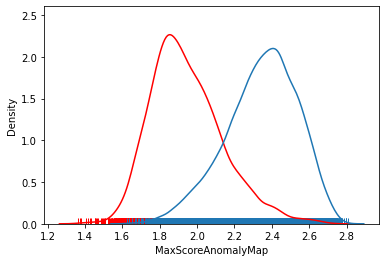

In [23]:
dfNormal = df_all.loc[df_all['Class'] == 'Normal']
dfTumor = df_all.loc[df_all['Class'] == 'Tumoral']
sns.distplot(dfNormal['MaxScoreAnomalyMap'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['MaxScoreAnomalyMap'], hist=False, rug=True)

<AxesSubplot:xlabel='MeanScoreAnomalyMap', ylabel='Density'>

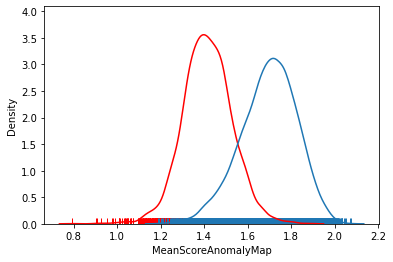

In [24]:
dfNormal = df_all.loc[df_all['Class'] == 'Normal']
dfTumor = df_all.loc[df_all['Class'] == 'Tumoral']
sns.distplot(dfNormal['MeanScoreAnomalyMap'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['MeanScoreAnomalyMap'], hist=False, rug=True)

<AxesSubplot:xlabel='MSE', ylabel='Density'>

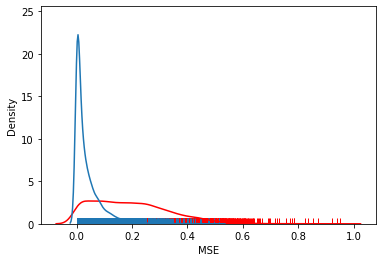

In [25]:
dfNormal = df_all.loc[df_all['Class'] == 'Normal']
dfTumor = df_all.loc[df_all['Class'] == 'Tumoral']
sns.distplot(dfNormal['MSE'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['MSE'], hist=False, rug=True)

<AxesSubplot:xlabel='MaxScoreAnomalyMap', ylabel='Density'>

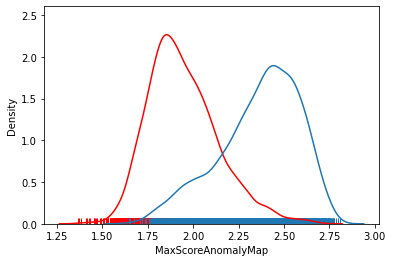

In [26]:
df_all_test = df_all[(df_all['Set'] == 'Test')]
dfNorm = df_all_test.loc[df_all_test['Class'] == 'Normal']
dfTumor = df_all_test.loc[df_all_test['Class'] == 'Tumoral']
sns.distplot(dfNorm['MaxScoreAnomalyMap'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['MaxScoreAnomalyMap'], hist=False, rug=True)

<AxesSubplot:xlabel='MeanScoreAnomalyMap', ylabel='Density'>

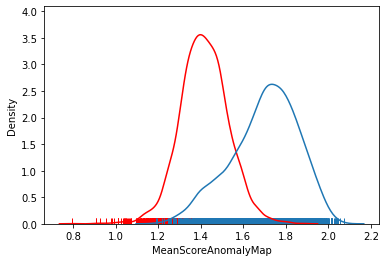

In [27]:
df_all_test = df_all[(df_all['Set'] == 'Test')]
dfNorm = df_all_test.loc[df_all_test['Class'] == 'Normal']
dfTumor = df_all_test.loc[df_all_test['Class'] == 'Tumoral']
sns.distplot(dfNorm['MeanScoreAnomalyMap'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['MeanScoreAnomalyMap'], hist=False, rug=True)

In [30]:
print(roc_auc_score(df_all_test['BinaryLabels'], df_all_test['MaxScoreAnomalyMap']))
print(roc_auc_score(df_all_test['BinaryLabels'], df_all_test['MeanScoreAnomalyMap']))
print(1- roc_auc_score(df_all_test['BinaryLabels'], df_all_test['MSE']))

0.9080941113299873
0.9176041647800578
0.8373492089027341


In [29]:
set(df_all_test[df_all_test['Set'] == 'Test']['TNEID'])

{'TNE1447',
 'TNE1460',
 'TNE1481',
 'TNE1488',
 'TNE1503',
 'TNE1512',
 'TNE1528',
 'TNE1536',
 'TNE1548',
 'TNE1552',
 'TNE1560',
 'TNE1574',
 'TNE1578',
 'TNE1586',
 'TNE1597',
 'TNE1606',
 'TNE1608',
 'TNE1710',
 'TNE1720',
 'TNE1732',
 'TNE1801',
 'TNE1817',
 'TNE1829',
 'TNE1831',
 'TNE1867',
 'TNE1931',
 'TNE1941',
 'TNE2003',
 'TNE2037',
 'TNE2041',
 'TNE2098',
 'TNE2123'}

In [43]:
tne_l =[]
ori_l = []
nb_normal = []
nb_tumor = []
roc_max = []
roc_mean = []
for tne in set(df_all_test[df_all_test['Set'] == 'Test']['TNEID']):
    print('TNEID = ', tne)
    tne_l.append(tne)
    ori_l.append(df_all_test[(df_all_test['TNEID'] == tne)]['Origin'].values[0])
    df_all_test_tne = df_all_test[ (df_all_test['TNEID'] == tne)]
    print('Normal ', df_all_test_tne[df_all_test_tne['Class'] == 'Normal'].shape[0])
    nb_normal.append(df_all_test_tne[df_all_test_tne['Class'] == 'Normal'].shape[0])
    print('Tumor ', df_all_test_tne[df_all_test_tne['Class'] == 'Tumoral'].shape[0])
    nb_tumor.append(df_all_test_tne[df_all_test_tne['Class'] == 'Tumoral'].shape[0])
    print('Max ',roc_auc_score(df_all_test_tne['BinaryLabels'], df_all_test_tne['MaxScoreAnomalyMap']))
    roc_max.append(roc_auc_score(df_all_test_tne['BinaryLabels'], df_all_test_tne['MaxScoreAnomalyMap']))
    print('MEan ',roc_auc_score(df_all_test_tne['BinaryLabels'], df_all_test_tne['MeanScoreAnomalyMap']))
    roc_mean.append(roc_auc_score(df_all_test_tne['BinaryLabels'], df_all_test_tne['MeanScoreAnomalyMap']))
  
    print('############################### \n')
roc_table = pd.DataFrame()
roc_table['TNEID'] = tne_l
roc_table['Origin'] = ori_l
roc_table['nb_normal'] = nb_normal
roc_table['nb_tumor'] = nb_tumor       
roc_table['roc_max'] = roc_max
roc_table['roc_mean'] = roc_mean

roc_table.to_csv('roc_table_tumor_normal.csv')

TNEID =  TNE1488
Normal  420
Tumor  40
Max  0.9963690476190477
MEan  0.9999404761904762
############################### 

TNEID =  TNE1720
Normal  147
Tumor  93
Max  0.8738936434788969
MEan  0.9079072489210738
############################### 

TNEID =  TNE1481
Normal  170
Tumor  69
Max  0.9783461210571185
MEan  0.9681159420289855
############################### 

TNEID =  TNE1560
Normal  50
Tumor  122
Max  0.7219672131147541
MEan  0.7434426229508198
############################### 

TNEID =  TNE1817
Normal  391
Tumor  76
Max  0.9823327500336518
MEan  0.9930677076322519
############################### 

TNEID =  TNE1732
Normal  198
Tumor  66
Max  0.8756504438322621
MEan  0.9447505356596265
############################### 

TNEID =  TNE1710
Normal  271
Tumor  75
Max  0.9419434194341944
MEan  0.9203444034440345
############################### 

TNEID =  TNE2098
Normal  180
Tumor  78
Max  0.9098290598290598
MEan  0.9665954415954416
############################### 

TNEID =  TNE1941
Normal 

In [44]:
roc_table.head()

,TNEID,Origin,nb_normal,nb_tumor,roc_max,roc_mean
0,TNE1488,Turin,420,40,0.996369,0.999940
1,TNE1720,Paris,147,93,0.873894,0.907907
2,TNE1481,Graz,170,69,0.978346,0.968116
3,TNE1560,Caen,50,122,0.721967,0.743443
4,TNE1817,Graz,391,76,0.982333,0.993068


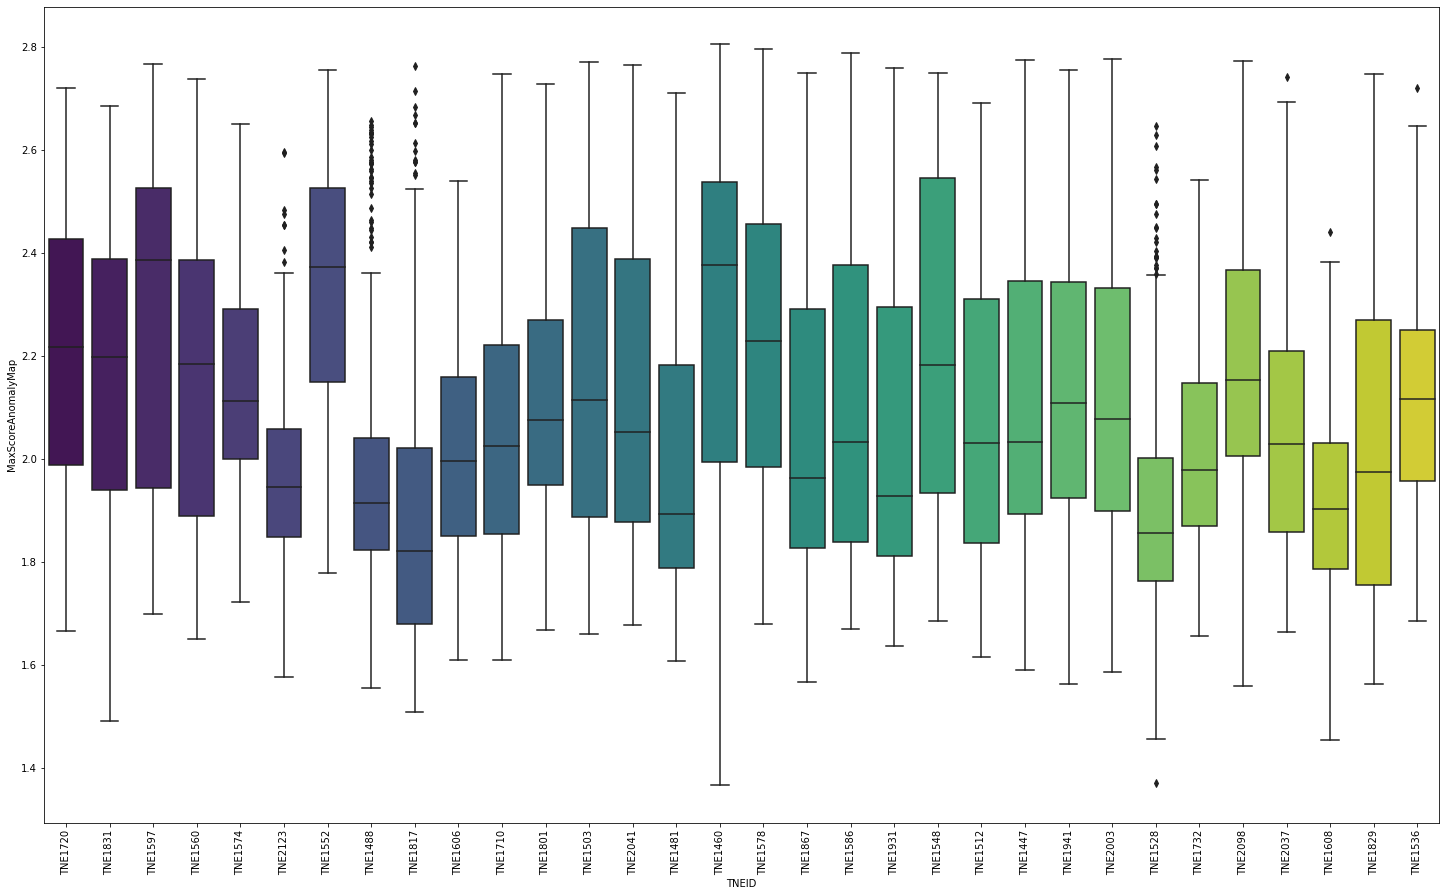

In [45]:
plt.figure(figsize=(25,15))
ax = sns.boxplot(x=df_all_test['TNEID'], y=df_all_test['MaxScoreAnomalyMap'], palette= 'viridis')
ax.tick_params(axis='x', rotation=90)

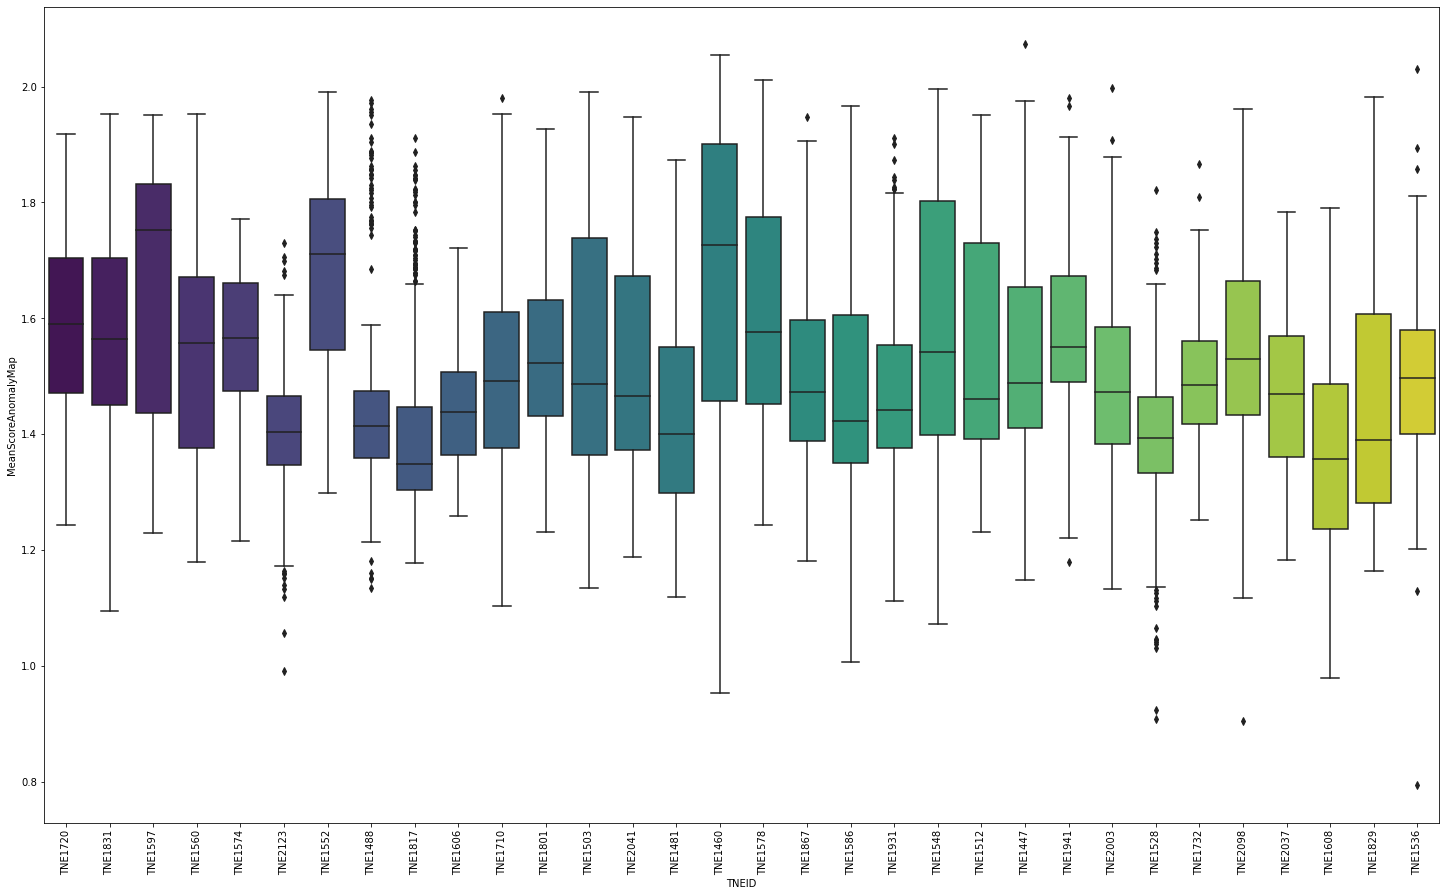

In [46]:
plt.figure(figsize=(25,15))
ax = sns.boxplot(x=df_all_test['TNEID'], y=df_all_test['MeanScoreAnomalyMap'], palette= 'viridis')
ax.tick_params(axis='x', rotation=90)

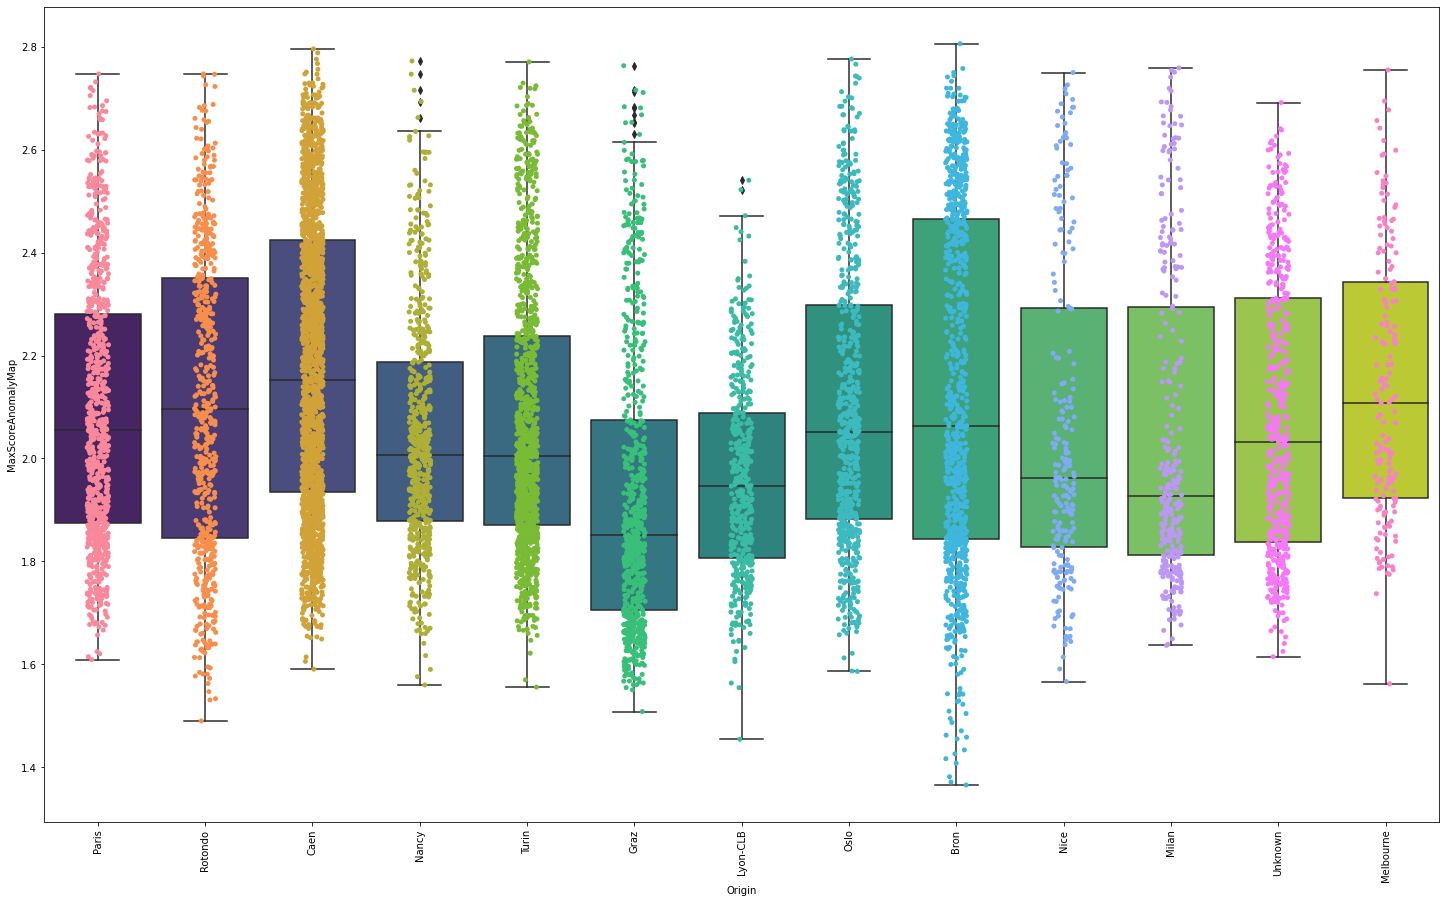

In [47]:
plt.figure(figsize=(25,15))
ax = sns.boxplot(x=df_all_test['Origin'], y=df_all_test['MaxScoreAnomalyMap'], palette= 'viridis')
ax = sns.stripplot(x = "Origin",      y = "MaxScoreAnomalyMap",     data = df_all_test)
ax.tick_params(axis='x', rotation=90)

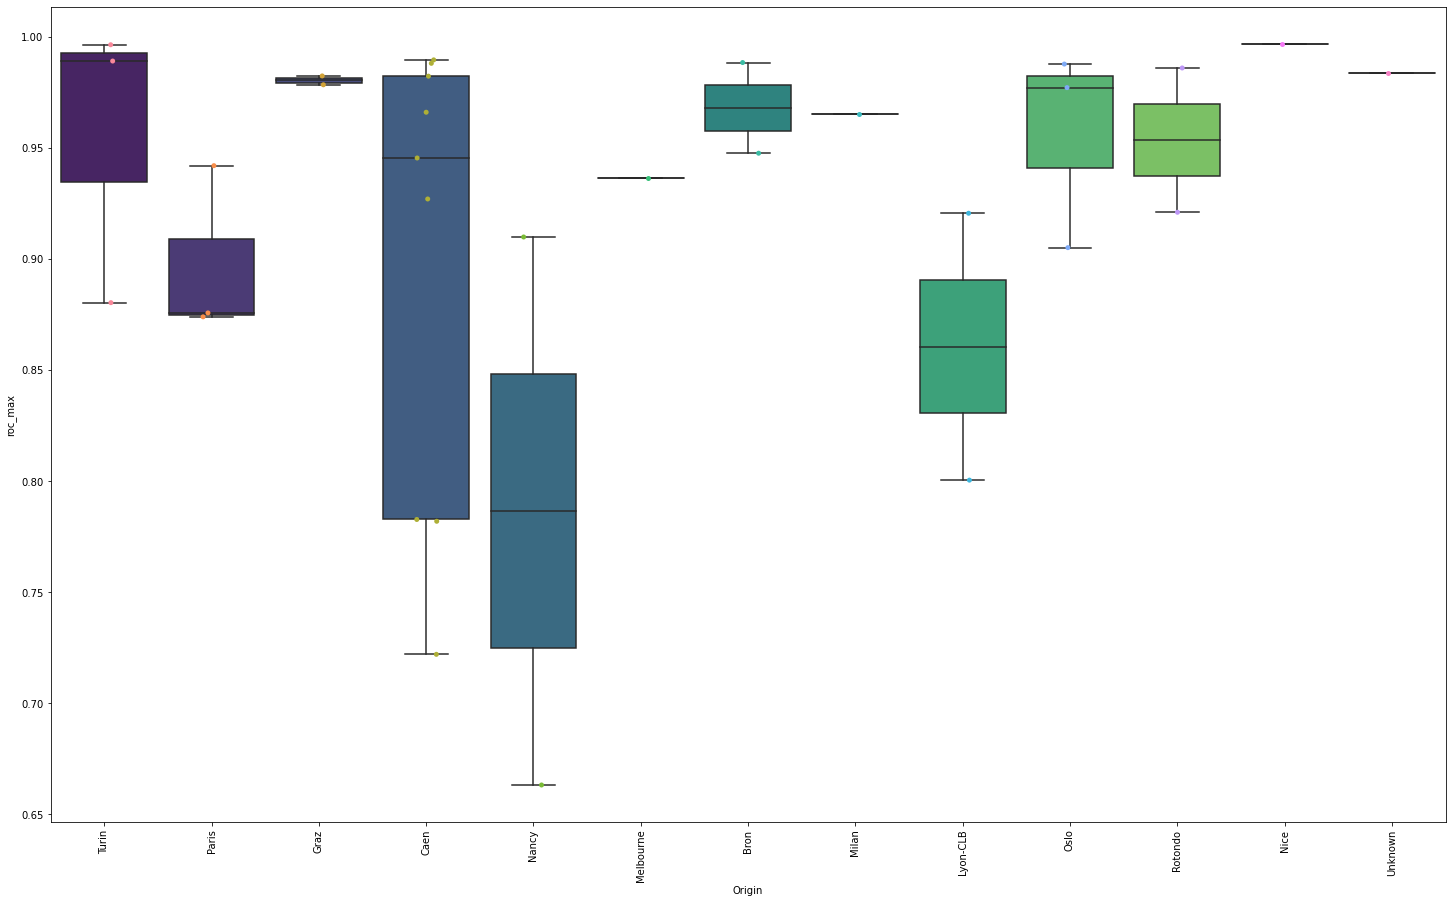

In [48]:
plt.figure(figsize=(25,15))
ax = sns.boxplot(x=roc_table['Origin'], y=roc_table['roc_max'], palette= 'viridis')
ax = sns.stripplot(x = "Origin",      y = "roc_max",     data = roc_table)
ax.tick_params(axis='x', rotation=90)

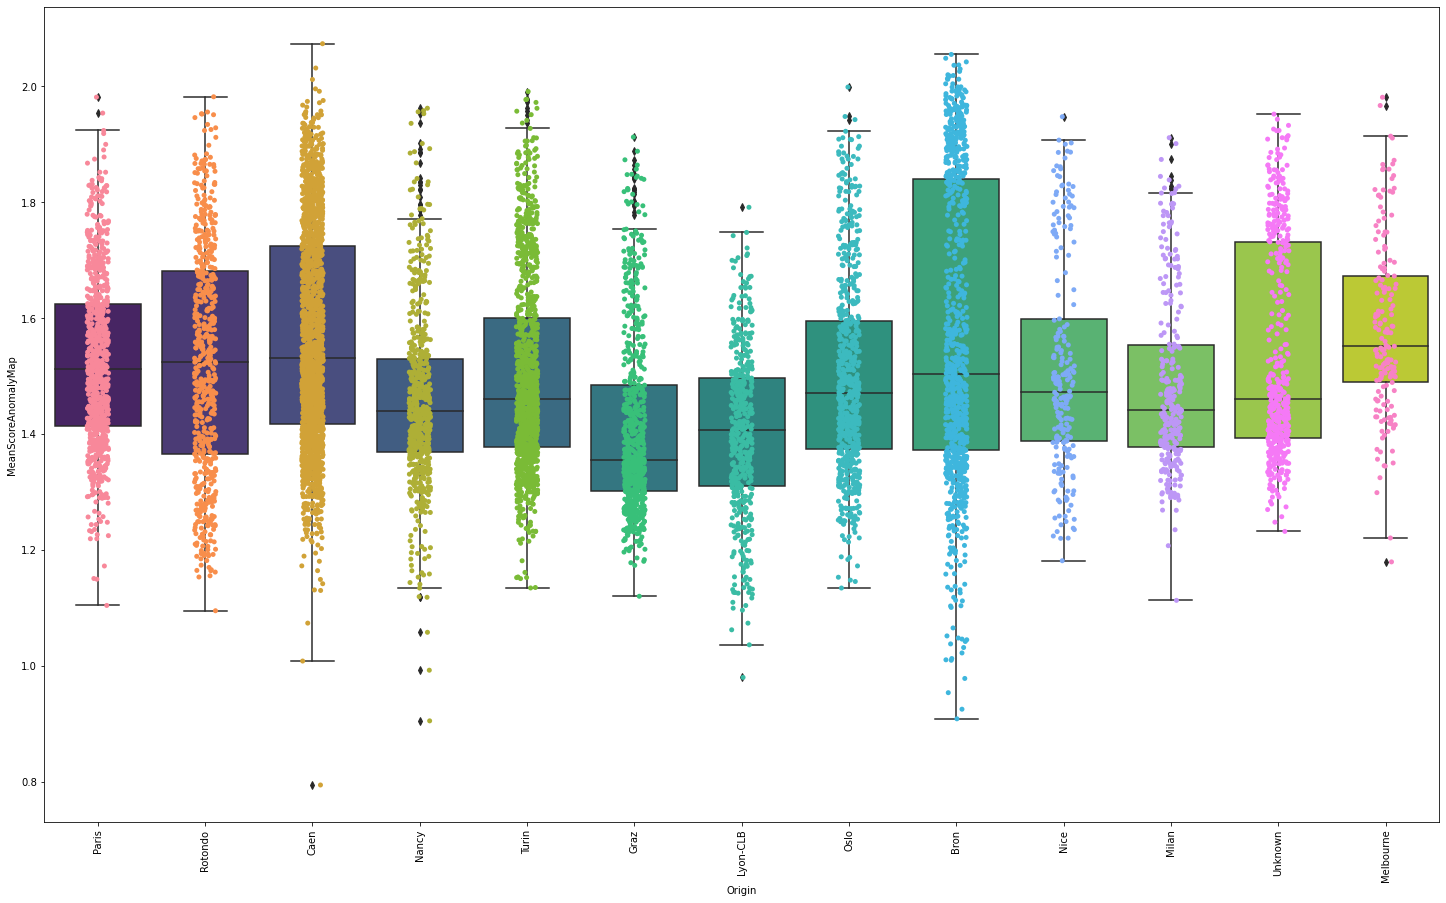

In [49]:
plt.figure(figsize=(25,15))
ax = sns.boxplot(x=df_all_test['Origin'], y=df_all_test['MeanScoreAnomalyMap'], palette= 'viridis')
ax = sns.stripplot(x = "Origin",      y = "MeanScoreAnomalyMap",     data = df_all_test)
ax.tick_params(axis='x', rotation=90)

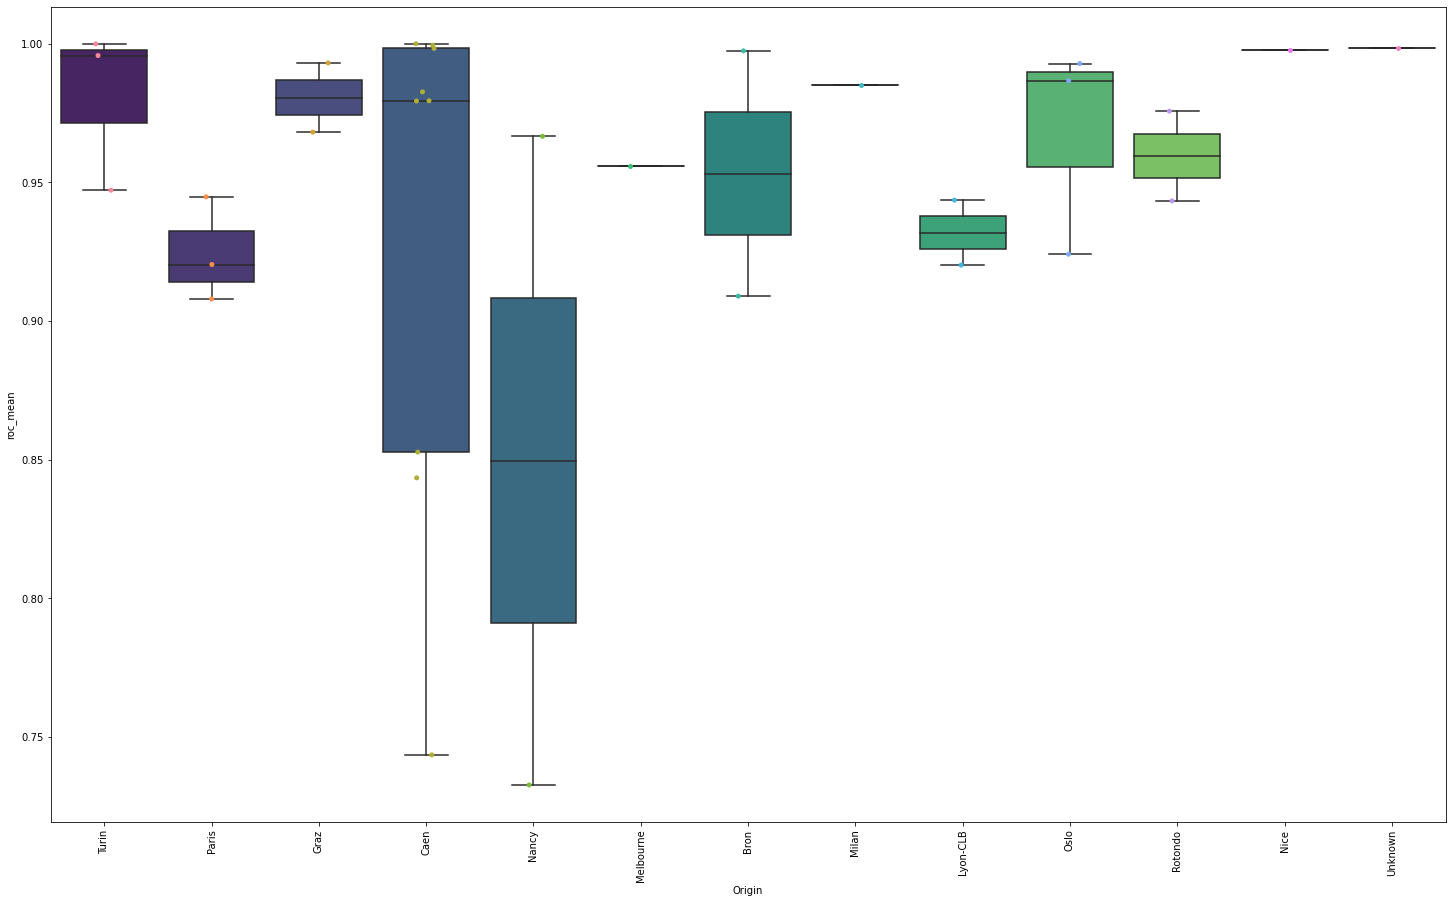

In [50]:
plt.figure(figsize=(25,15))
ax = sns.boxplot(x=roc_table['Origin'], y=roc_table['roc_mean'], palette= 'viridis')
ax = sns.stripplot(x = "Origin",      y = "roc_mean",     data = roc_table)
ax.tick_params(axis='x', rotation=90)

In [51]:
origin_l =[]
nb_normal = []
nb_tumor = []
roc_max = []
roc_mean = []
roc_loss = []
roc_max_div_loss = []
for ori in set(df_all_test[df_all_test['Set'] == 'Test']['Origin']):
    print('Origin = ', ori)
    origin_l.append(ori)
    df_all_ori = df_all_test[(df_all_test['Origin'] == ori)]
    print('Normal ', df_all_ori[df_all_ori['Class'] == 'Normal'].shape[0])
    nb_normal.append(df_all_ori[df_all_ori['Class'] == 'Normal'].shape[0])
    print('Tumor ', df_all_ori[df_all_ori['Class'] == 'Tumoral'].shape[0])
    nb_tumor.append(df_all_ori[df_all_ori['Class'] == 'Tumoral'].shape[0])
    print('Max ',roc_auc_score(df_all_ori['BinaryLabels'], df_all_ori['MaxScoreAnomalyMap']))
    roc_max.append(roc_auc_score(df_all_ori['BinaryLabels'], df_all_ori['MaxScoreAnomalyMap']))
    print('MEan ',roc_auc_score(df_all_ori['BinaryLabels'], df_all_ori['MeanScoreAnomalyMap']))
    roc_mean.append(roc_auc_score(df_all_ori['BinaryLabels'], df_all_ori['MeanScoreAnomalyMap']))
   
    print('############################### \n')
roc_table = pd.DataFrame()
roc_table['Origin'] = origin_l
roc_table['nb_normal'] = nb_normal
roc_table['nb_tumor'] = nb_tumor       
roc_table['roc_max'] = roc_max
roc_table['roc_mean'] = roc_mean


Origin =  Nice
Normal  170
Tumor  52
Max  0.9968325791855204
MEan  0.997737556561086
############################### 

Origin =  Lyon-CLB
Normal  339
Tumor  138
Max  0.8545808216835535
MEan  0.9269163353426532
############################### 

Origin =  Bron
Normal  565
Tumor  335
Max  0.9852912429005415
MEan  0.9835424646678114
############################### 

Origin =  Paris
Normal  616
Tumor  234
Max  0.9035062160062161
MEan  0.9227716727716727
############################### 

Origin =  Unknown
Normal  318
Tumor  158
Max  0.9836796433404984
MEan  0.9985868959477748
############################### 

Origin =  Rotondo
Normal  347
Tumor  253
Max  0.9427390051372009
MEan  0.9531273137337541
############################### 

Origin =  Milan
Normal  228
Tumor  66
Max  0.9650451887293992
MEan  0.9850478468899522
############################### 

Origin =  Oslo
Normal  482
Tumor  178
Max  0.9506037577509441
MEan  0.9685533125087417
############################### 

Origin =  Turin
Normal 

In [52]:
roc_table

,Origin,nb_normal,nb_tumor,roc_max,roc_mean
0,Nice,170,52,0.996833,0.997738
1,Lyon-CLB,339,138,0.854581,0.926916
2,Bron,565,335,0.985291,0.983542
3,Paris,616,234,0.903506,0.922772
4,Unknown,318,158,0.983680,0.998587
5,Rotondo,347,253,0.942739,0.953127
6,Milan,228,66,0.965045,0.985048
7,Oslo,482,178,0.950604,0.968553
8,Turin,894,295,0.959773,0.985261
9,Caen,1058,885,0.898825,0.916203


In [53]:
threshold = np.linspace(np.min(df_all_test['MeanScoreAnomalyMap']), np.max(df_all_test['MeanScoreAnomalyMap']), 500)
precision_list = []
recall_list = []
f1_list = []
roc_list = []
FPR_list = []
TPR_list = []
specifity_list = []
sensitivity_list = []
print(len(threshold))
#df_299 = df_299[(df_299['TNEID'] == 'TNE0001') | (df_299['TNEID'] == 'TNE0803')]
df_MaxAnomalyScore = df_all_test['MeanScoreAnomalyMap']
df_exp_label = df_all_test['BinaryLabels']
for j in range(len(threshold)):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    emp_label = []

    for i in range(df_all_test.shape[0]):
        MSEFM = df_MaxAnomalyScore.iloc[i]
        exp_label = df_exp_label.iloc[i]
        if MSEFM <= threshold[j]:
            empirique_label = 0
            emp_label.append(empirique_label)
            if exp_label == empirique_label:
                TN += 1
            else:
                FN += 1
        else:
            empirique_label = 1
            emp_label.append(empirique_label)
            if exp_label == empirique_label:
                TP += 1
            else:
                FP += 1
    try :
        precision = TP / (TP + FP)
    except:
        precision = 0
    try:
        recall = TP / (TP + FN) #sensibilite 
    except:
        recall = 0
    try:
        sprecificite = TN / (TN+FP)
    except:
        sprecificite = 0
    try:
        sensitivity = TP/ (TP+FN)
    except:
        sensitivity = 0
    try:
        TPR = TP / (TP + FN)
    except:
        TPR = 0
    try:
        spe = TN/(TN + FP)
    except :
        spe = 0
    try:
        FPR = FP / (FP + TN)
    except:
        FPR = 0
    FPR_list.append(FPR)
    TPR_list.append(TPR)
    specifity_list.append(spe)
    sensitivity_list.append(sensitivity)
    y_true = np.array(df_exp_label.tolist())
    y_scores = np.array(emp_label)
    #roc = roc_auc_score(y_true,y_scores) # ?????
    
    precision_list.append(precision)
    recall_list.append(recall)
    #roc_list.append(roc)

500


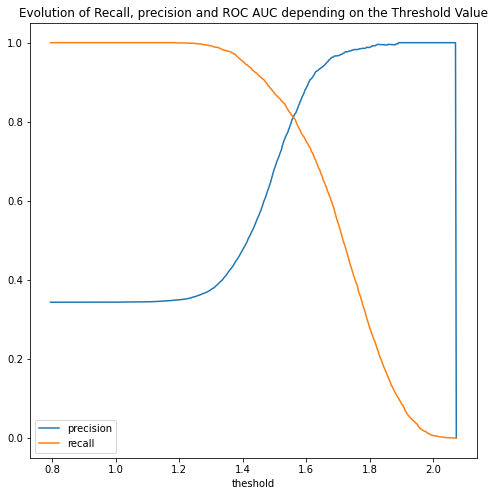

In [54]:
plt.figure(figsize=(8,8))
plt.plot(threshold, precision_list, label='precision')
plt.plot(threshold, recall_list, label='recall')
#plt.plot(threshold, roc_list, label='roc_auc')
plt.legend()
plt.title('Evolution of Recall, precision and ROC AUC depending on the Threshold Value')
plt.xlabel('theshold')
plt.show()

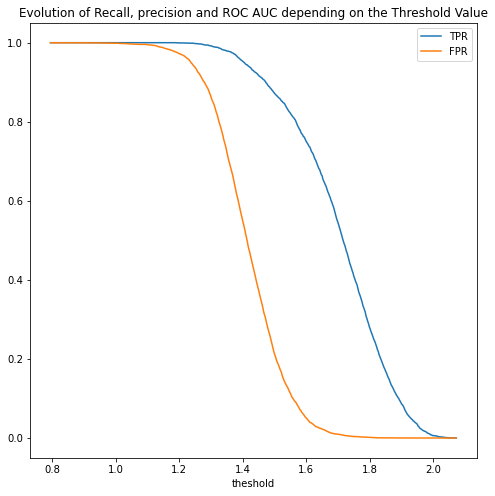

In [55]:
plt.figure(figsize=(8,8))
plt.plot(threshold, TPR_list, label='TPR')
plt.plot(threshold, FPR_list, label='FPR')
plt.legend()
plt.title('Evolution of Recall, precision and ROC AUC depending on the Threshold Value')
plt.xlabel('theshold')
plt.show()

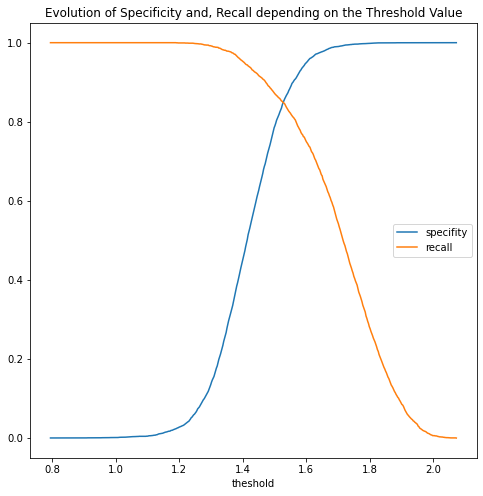

In [56]:
plt.figure(figsize=(8,8))
plt.plot(threshold, specifity_list, label='specifity')
plt.plot(threshold, recall_list, label='recall')
plt.legend()
plt.title('Evolution of Specificity and, Recall depending on the Threshold Value')
plt.xlabel('theshold')
plt.show()

No handles with labels found to put in legend.


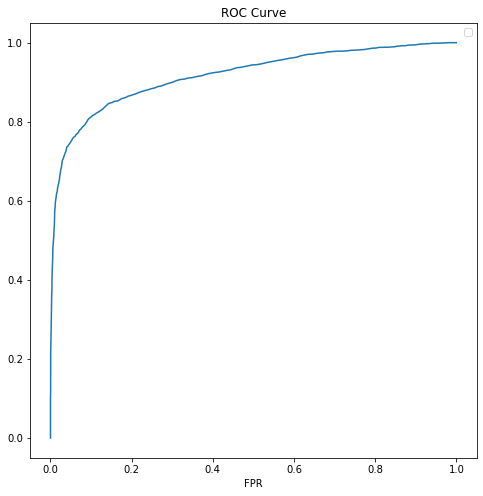

In [57]:
# ROC Curve
plt.figure(figsize=(8,8))
plt.plot(FPR_list, TPR_list)
plt.legend()
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.show()

No handles with labels found to put in legend.


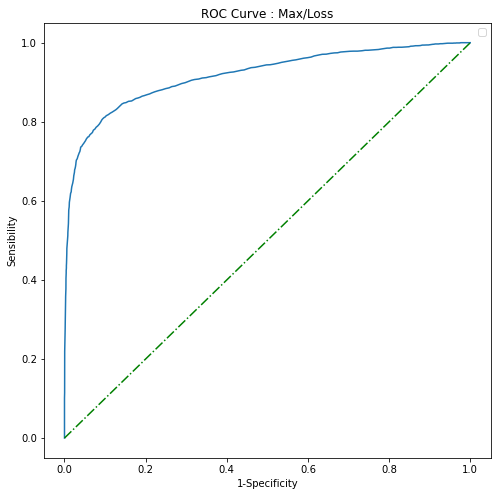

In [58]:
# ROC Curve
x = np.linspace(0,1,100)
y = x
plt.figure(figsize=(8,8))
plt.plot( 1- np.array(specifity_list) , sensitivity_list)
plt.plot(x, y,'-.g')
plt.legend()
plt.title('ROC Curve : Max/Loss')
plt.xlabel('1-Specificity')
plt.ylabel('Sensibility')

plt.show()

## Youden Index

In [70]:
df_metric = pd.DataFrame()
df_metric['threshold'] = threshold
df_metric['Recall'] = TPR_list
df_metric['FPR'] = FPR_list
df_metric['Precison'] = precision_list
df_metric['Specifity'] = specifity_list
df_metric['Sensitivity'] = sensitivity_list
df_metric['Recall/Specifity'] = np.array(TPR_list)/ np.array(specifity_list)

In [71]:
df_metric['YoudenIndex'] = df_metric['Sensitivity'] + df_metric['Specifity'] -1

+ Pr = TP / (TP + FP)
+ Recall = TP  / (TP + FN)


In [72]:
df_metric.head()

,threshold,Recall,FPR,Precison,Specifity,Sensitivity,Recall/Specifity,YoudenIndex
0,0.888700,1.0,0.999752,0.316593,0.000248,1.0,4029.0,0.000248
1,0.890846,1.0,0.999504,0.316647,0.000496,1.0,2014.5,0.000496
2,0.892993,1.0,0.999255,0.316701,0.000745,1.0,1343.0,0.000745
3,0.895139,1.0,0.999255,0.316701,0.000745,1.0,1343.0,0.000745
4,0.897286,1.0,0.999255,0.316701,0.000745,1.0,1343.0,0.000745


In [73]:
youden_threshold = df_metric[df_metric['YoudenIndex'] == max(df_metric['YoudenIndex'])]['threshold'].values

In [74]:
youden_threshold

array([1.42530591])

In [75]:
max(df_metric['YoudenIndex'])

0.7480552968470549

In [76]:
df_metric[(df_metric['Recall'] < 1) & (df_metric['Recall'] > 0.85)]

,threshold,Recall,FPR,Precison,Specifity,Sensitivity,Recall/Specifity,YoudenIndex
100,1.103342,0.999464,0.855051,0.351224,0.144949,0.999464,6.895275,0.144413
101,1.105489,0.999464,0.849839,0.352619,0.150161,0.999464,6.655935,0.149625
102,1.107635,0.999464,0.846612,0.353487,0.153388,0.999464,6.515924,0.152852
103,1.109782,0.999464,0.842641,0.354563,0.157359,0.999464,6.351484,0.156823
104,1.111928,0.999464,0.838670,0.355645,0.161330,0.999464,6.195140,0.160794
...,...,...,...,...,...,...,...,...
253,1.431745,0.864416,0.118640,0.771401,0.881360,0.864416,0.980775,0.745776
254,1.433892,0.860665,0.116158,0.774349,0.883842,0.860665,0.973776,0.744507
255,1.436038,0.857985,0.112931,0.778696,0.887069,0.857985,0.967214,0.745054
256,1.438184,0.855305,0.111442,0.780440,0.888558,0.855305,0.962577,0.743863


In [77]:
#youden_threshold = -0.000012

In [78]:
classif_best_thr = []
pred_label = []
for i in range(df_all_test.shape[0]):
    if df_all_test.iloc[i,:]['MeanScoreAnomalyMap']  < youden_threshold:
        pred_label.append('Normal')
    else:
        pred_label.append('Tumor')

In [79]:
df_all_test['PredLabel'] = pred_label

In [80]:
df_all_test.head()

,FilesPath,BinaryLabels,MaxScoreAnomalyMap,MeanScoreAnomalyMap,Set,TNEID,Class,MSE,Origin,PredLabel
0,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.232866,1.432099,Test,TNE0869,Tumor,0.001299,Oslo,Tumor
1,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,1.820434,1.217720,Test,TNE0869,Normal,0.201124,Oslo,Normal
2,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,1.895194,1.193185,Test,TNE0869,Normal,0.139658,Oslo,Normal
4,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,2.423360,1.612984,Test,TNE0869,Normal,0.023857,Oslo,Tumor
6,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.162080,1.457609,Test,TNE0034,Tumor,0.011411,Melbourne,Tumor


In [81]:
df_all_test.iloc[0,0]

'/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE0869/Tumor/TNE0869_15361_56449.jpg'

In [82]:
df_all_test[(df_all_test['Class'] == 'Tumor')].shape

(1866, 10)

In [83]:
df_all_test[(df_all_test['Class'] == 'Normal')].shape

(4029, 10)

In [84]:
# True positive %
df_all_test[(df_all_test['Class'] == 'Normal') &  
                (df_all_test['PredLabel'] == 'Normal')].shape[0] / df_all_test[(df_all_test['Class'] == 'Normal')].shape[0]

0.872921320426905

In [85]:
TP  = df_all_test[(df_all_test['Class'] == 'Normal') &  
                (df_all_test['PredLabel'] == 'Normal')].shape[0] 

In [86]:
# Faux Negatif %
df_all_test[(df_all_test['Class'] == 'Normal') & 
           (df_all_test['PredLabel'] == 'Tumor')].shape[0] /  df_all_test[(df_all_test['Class'] == 'Normal')].shape[0]

0.12707867957309507

In [87]:
FN  = df_all_test[(df_all_test['Class'] == 'Normal') & 
           (df_all_test['PredLabel'] == 'Tumor')].shape[0] 

In [88]:
# Vrai negatif %
df_all_test[(df_all_test['Class'] == 'Tumor') & 
                (df_all_test['PredLabel'] == 'Tumor')].shape[0] / df_all_test[(df_all_test['Class'] == 'Tumor')].shape[0]

0.87513397642015

In [89]:
TN = df_all_test[(df_all_test['Class'] == 'Tumor') & 
                (df_all_test['PredLabel'] == 'Tumor')].shape[0] 

In [90]:
# Faux Positif % 
df_all_test[(df_all_test['Class'] == 'Tumor') &  
                (df_all_test['PredLabel'] == 'Normal')].shape[0] / df_all_test[(df_all_test['Class'] == 'Tumor')].shape[0]

0.12486602357984995

In [91]:
FP = df_all_test[(df_all_test['Class'] == 'Tumor') &  
                (df_all_test['PredLabel'] == 'Normal')].shape[0]

In [92]:
# Sensitivity current
#  Out of all the people that have the disease, how many got positive test results?
Sn  = TP / (TP + FN)
print('Sensitivity = '  , Sn)

Sensitivity =  0.872921320426905


In [93]:
# Specificity current
# Out of all the people that do not have the disease, how many got negative results?
Sp = TN / (TN + FP)
print('Specificity = '  , Sp)

Specificity =  0.87513397642015


In [94]:
# Pr current
# Out of all the examples that predicted as positive, how many are really positive?
Pr = TP / (TP + FP)
print('Precision = '  , Pr)


Precision =  0.9378666666666666


In [95]:

for tne in set(df_all_test[df_all_test['Set'] == 'Test']['TNEID']):
    print('TNEID = ', tne)
    print(df_all_test[(df_all_test['TNEID'] == tne)]['Origin'].values[0])
    df_all_test_tne = df_all_test[ (df_all_test['TNEID'] == tne)]
    print('Normal ', df_all_test_tne[df_all_test_tne['Class'] == 'Normal'].shape[0])
    print('Tumor ', df_all_test_tne[df_all_test_tne['Class'] == 'Tumor'].shape[0])
    TP  = df_all_test_tne[(df_all_test_tne['Class'] == 'Normal') &  
                (df_all_test_tne['PredLabel'] == 'Normal')].shape[0] 
    FN  = df_all_test_tne[(df_all_test_tne['Class'] == 'Normal') & 
           (df_all_test_tne['PredLabel'] == 'Tumor')].shape[0] 
    TN = df_all_test_tne[(df_all_test_tne['Class'] == 'Tumor') & 
                (df_all_test_tne['PredLabel'] == 'Tumor')].shape[0] 
    FP = df_all_test_tne[(df_all_test_tne['Class'] == 'Tumor') &  
                (df_all_test_tne['PredLabel'] == 'Normal')].shape[0]
    
    print('Precision =', TP / (TP + FP))
    print('Sensitivity  = ', TP / (TP + FN))
    print('Specificity = ', TN / (TN + FP))
    print('############################### \n')


TNEID =  TNE0008
Milan
Normal  191
Tumor  27
Precision = 0.8909090909090909
Sensitivity  =  0.5130890052356021
Specificity =  0.5555555555555556
############################### 

TNEID =  TNE1408
Lyon-CLB
Normal  123
Tumor  40
Precision = 0.9905660377358491
Sensitivity  =  0.8536585365853658
Specificity =  0.975
############################### 

TNEID =  TNE1417
Nice
Normal  417
Tumor  21
Precision = 0.9854014598540146
Sensitivity  =  0.9712230215827338
Specificity =  0.7142857142857143
############################### 

TNEID =  TNE1410
Lyon-CLB
Normal  156
Tumor  85
Precision = 0.96875
Sensitivity  =  0.9935897435897436
Specificity =  0.9411764705882353
############################### 

TNEID =  TNE0987
Paris
Normal  104
Tumor  40
Precision = 1.0
Sensitivity  =  0.9807692307692307
Specificity =  1.0
############################### 

TNEID =  TNE0227
Caen
Normal  143
Tumor  26
Precision = 1.0
Sensitivity  =  0.8251748251748252
Specificity =  1.0
############################### 

TNEID 

## Misclassified Tumor

In [96]:
miss_tumor = df_all_test[(df_all_test['Class'] == 'Tumor') 
                             &  (df_all_test['PredLabel'] == 'Normal')]

In [97]:
miss_tumor.head()

,FilesPath,BinaryLabels,MaxScoreAnomalyMap,MeanScoreAnomalyMap,Set,TNEID,Class,MSE,Origin,PredLabel
35,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.002000,1.307706,Test,TNE0869,Tumor,0.071237,Oslo,Normal
42,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.161311,1.238522,Test,TNE0863,Tumor,0.011576,Oslo,Normal
96,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,1.882506,1.376351,Test,TNE0869,Tumor,0.149302,Oslo,Normal
120,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.150835,1.406839,Test,TNE0002,Tumor,0.013940,Milan,Normal
179,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.150822,1.415939,Test,TNE0007,Tumor,0.013943,Milan,Normal


In [98]:
miss_tumor.shape
miss_tumor = miss_tumor.sample(frac=1).reset_index(drop=True)
miss_tumor = miss_tumor.sort_values(by = 'MeanScoreAnomalyMap', ascending=True)

In [99]:
miss_tumor.head()

,FilesPath,BinaryLabels,MaxScoreAnomalyMap,MeanScoreAnomalyMap,Set,TNEID,Class,MSE,Origin,PredLabel
95,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,1.832269,1.102335,Test,TNE0008,Tumor,0.190648,Milan,Normal
61,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.172035,1.160400,Test,TNE0008,Tumor,0.009383,Milan,Normal
11,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,1.869986,1.187683,Test,TNE0869,Tumor,0.159134,Oslo,Normal
75,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,1.918521,1.195189,Test,TNE0869,Tumor,0.122767,Oslo,Normal
28,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,1.888352,1.197984,Test,TNE1417,Tumor,0.144818,Nice,Normal


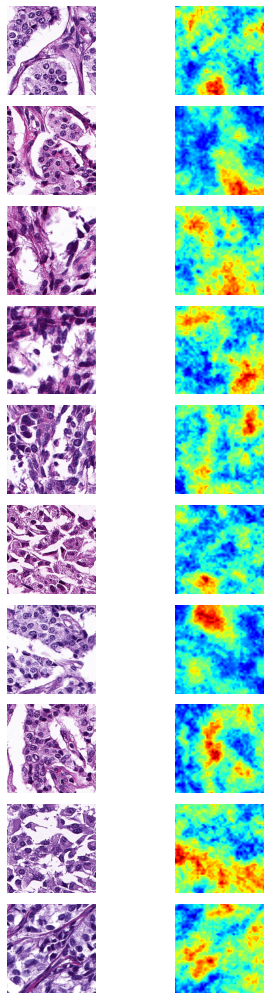

In [100]:
def plot_10_tiles(anom_path, miss_tumor):
    fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(6,14))  
    j = 0 
    i = 0
    for p in miss_tumor['FilesPath'].iloc[:10]:
        im = cv2.imread(p)
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        anom_name_c = anom_path  +  str(p.split('/')[-1].split('.')[0]) + '.npy'
        anom_map_im  = np.load(anom_name_c)
        
        axes[i,0].imshow(im) 
        axes[i,0].axis('off')

        axes[i,1].imshow(anom_map_im, cmap = 'jet' ) 
        axes[i,1].axis('off')
        i +=1  
        
        fig.tight_layout()
anom_path = '/gpfsscratch/rech/ohv/ueu39kt/CFLOW/viz/TumorNormal_test/Tumor/anomaly_map/Tumor/'

plot_10_tiles(anom_path, miss_tumor)

## Misclassified Normal

In [101]:
miss_normal = df_all_test[(df_all_test['Class'] == 'Normal') & 
                              (df_all_test['PredLabel'] == 'Tumor')]

In [102]:
miss_normal = miss_normal.sort_values(by = 'MeanScoreAnomalyMap', ascending=False)

In [103]:
miss_normal.head()

,FilesPath,BinaryLabels,MaxScoreAnomalyMap,MeanScoreAnomalyMap,Set,TNEID,Class,MSE,Origin,PredLabel
5411,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,2.695850,1.829243,Test,TNE1508,Normal,0.182284,Turin,Tumor
146,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,2.457451,1.745131,Test,TNE1508,Normal,0.035550,Turin,Tumor
3445,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,2.459806,1.726488,Test,TNE1508,Normal,0.036444,Turin,Tumor
5363,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,2.445397,1.724153,Test,TNE1508,Normal,0.031150,Turin,Tumor
1202,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,2.201050,1.716684,Test,TNE0590,Normal,0.004604,Turin,Tumor


In [104]:
file_path_miss_norm = []
for i in range(miss_normal.shape[0]):
    file_path_miss_norm.append(miss_normal.iloc[i,0])
file_path_miss_norm

['/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE1508/Normal/TNE1508_68737_67585.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE1508/Normal/TNE1508_69121_33025.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE1508/Normal/TNE1508_69121_65665.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE1508/Normal/TNE1508_69121_33409.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE0590/Normal/TNE0590-001_15745_55681.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE0227/Normal/TNE0227_14593_14977.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE0008/Normal/TNE0008_7297_15361.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE1508/Normal/TNE1508_69121_33793.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE0034/Normal/TNE0034_23425_4993.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/Tum

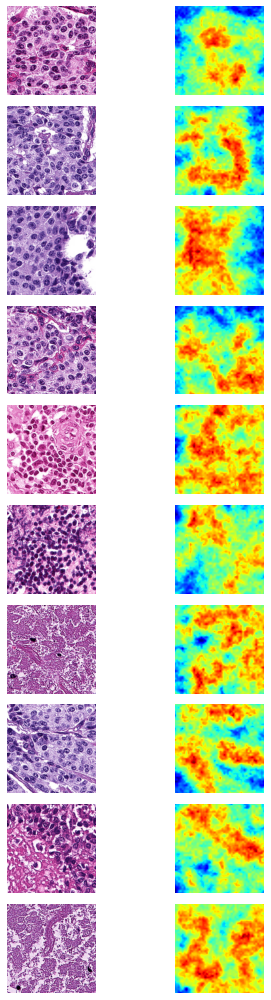

In [105]:
anom_path = '/gpfsscratch/rech/ohv/ueu39kt/CFLOW/viz/TumorNormal_test/Tumor/anomaly_map/Normal/'
plot_10_tiles(anom_path, miss_normal)

## Most discriminant

In [109]:
best_normal = df_all_test[(df_all_test['Class'] == 'Normal') &  
                              (df_all_test['PredLabel'] == 'Normal')]
best_normal = best_normal.sort_values(by = 'MeanScoreAnomalyMap', ascending=True)
best_normal

,FilesPath,BinaryLabels,MaxScoreAnomalyMap,MeanScoreAnomalyMap,Set,TNEID,Class,MSE,Origin,PredLabel
4520,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,1.407757,0.888700,Test,TNE0869,Normal,0.741572,Oslo,Normal
6032,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,1.301404,0.889985,Test,TNE1417,Normal,0.936054,Nice,Normal
5922,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,1.301546,0.892775,Test,TNE1417,Normal,0.935778,Nice,Normal
1401,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,1.386648,0.909098,Test,TNE1508,Normal,0.778373,Turin,Normal
2289,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,1.661881,0.915648,Test,TNE1417,Normal,0.368475,Nice,Normal
...,...,...,...,...,...,...,...,...,...,...
4263,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,2.086086,1.424290,Test,TNE0227,Normal,0.033422,Caen,Normal
1293,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,2.211774,1.424321,Test,TNE0870,Normal,0.003264,Oslo,Normal
1889,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,2.155757,1.424505,Test,TNE0870,Normal,0.012802,Oslo,Normal
3201,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,2.240960,1.424777,Test,TNE0001,Normal,0.000781,Milan,Normal


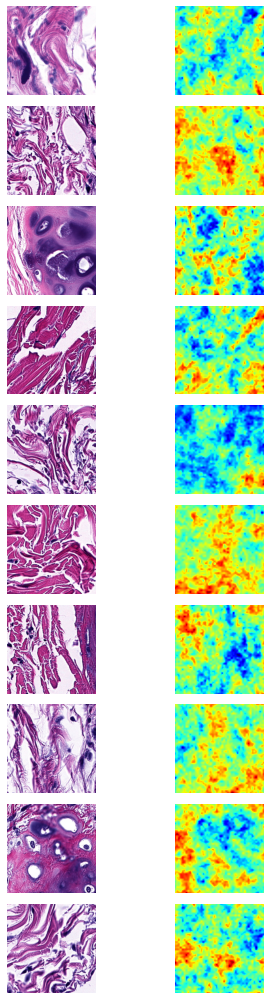

In [111]:
anom_path = '/gpfsscratch/rech/ohv/ueu39kt/CFLOW/viz/TumorNormal_test/Tumor/anomaly_map/Normal/'
plot_10_tiles(anom_path, best_normal)

## Less discriminant

In [112]:
less_discriminant = df_all_test[(df_all_test['Class'] == 'Tumor')
                                    &  (df_all_test['PredLabel'] == 'Tumor')]
less_discriminant = less_discriminant.sort_values(by = 'MeanScoreAnomalyMap', ascending=False)
less_discriminant.head()

,FilesPath,BinaryLabels,MaxScoreAnomalyMap,MeanScoreAnomalyMap,Set,TNEID,Class,MSE,Origin,PredLabel
3161,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.598805,1.959766,Test,TNE1408,Tumor,0.108835,Lyon-CLB,Tumor
1738,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.486123,1.936394,Test,TNE0892,Tumor,0.047185,Oslo,Tumor
2499,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.598531,1.932246,Test,TNE0034,Tumor,0.108655,Melbourne,Tumor
5049,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.470331,1.924155,Test,TNE0987,Tumor,0.040573,Paris,Tumor
1044,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.569881,1.914446,Test,TNE1410,Tumor,0.090588,Lyon-CLB,Tumor


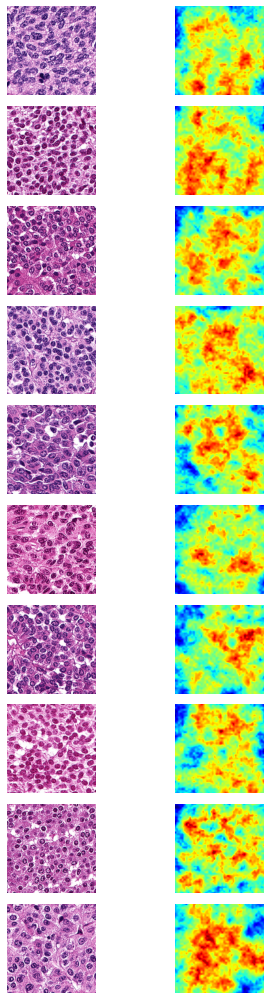

In [114]:
anom_path = '/gpfsscratch/rech/ohv/ueu39kt/CFLOW/viz/TumorNormal_test/Tumor/anomaly_map/Tumor/'
plot_10_tiles(anom_path, less_discriminant)